In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
suicide_risk = pd.read_csv("foreveralone.csv")

In [60]:
suicide_risk_test = pd.read_csv("foreveralone.csv") #cleaned data
suicide_risk_test2 = pd.read_csv("foreveralone.csv") #cleaned and labelencoded data

In [61]:
columns_to_drop = ["time"]
suicide_risk_test2.drop(columns_to_drop, axis=1, inplace=True)

In [62]:
suicide_risk_test2.columns

Index(['gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight', 'virgin',
       'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'attempt_suicide', 'employment',
       'job_title', 'edu_level', 'improve_yourself_how'],
      dtype='object')

In [63]:
race_freq = (suicide_risk_test['race'].value_counts())/suicide_risk_test.shape[0]
less_freq_race = race_freq[race_freq<=0.04]
suicide_risk_test.loc[suicide_risk_test['race'].isin(less_freq_race.index.tolist()), "race"] = "other"
suicide_risk_test["race"].value_counts()

#paysex_freq = (suicide_risk_test['pay_for_sex'].value_counts())/suicide_risk_test.shape[0]
#less_freq_paysex = paysex_freq[paysex_freq<=0.3]
#suicide_risk_test.loc[suicide_risk_test['pay_for_sex'].isin(less_freq_paysex.index.tolist()), "pay_for_sex"] = "Yes"
#suicide_risk_test["pay_for_sex"].value_counts()

sxlty_freq = (suicide_risk_test['sexuallity'].value_counts())/suicide_risk_test.shape[0]
less_freq_sxlty = sxlty_freq[sxlty_freq<=0.1]
suicide_risk_test.loc[suicide_risk_test['sexuallity'].isin(less_freq_sxlty.index.tolist()), "sexuallity"] = "Bi/Gay/Lesbian"
suicide_risk_test["sexuallity"].value_counts()

help_freq = (suicide_risk_test['what_help_from_others'].value_counts())/suicide_risk_test.shape[0]
less_freq_help = help_freq[help_freq<=0.15]
suicide_risk_test.loc[suicide_risk_test['what_help_from_others'].isin(less_freq_help.index.tolist()), "what_help_from_others"] = "Some form of help"
suicide_risk_test["what_help_from_others"].value_counts()

suicide_risk_test = suicide_risk_test.replace({'employment':  {'A homemaker': "Employed", 'Retired': "Unemployed", 'Military': "Employed", 'Unable to work': "Unemployed", 'Self-employed': "Employed", 'Out of work and looking for work': "Unemployed", 'Out of work but not currently looking for work': "Unemployed", 'Employed for wages': "Employed", 'A student': "Student"}})

suicide_risk_test.loc[suicide_risk['gender'].isin(["Transgender female"]),"gender"] = "Female"
suicide_risk_test.loc[suicide_risk['gender'].isin(["Transgender male"]),"gender"] = "Male"

suicide_risk_test.loc[suicide_risk_test.improve_yourself_how.str.contains("Therapy"), "improve_yourself_how"] = "Therapy"
suicide_risk_test.loc[suicide_risk_test.improve_yourself_how.str.contains("gym"), "improve_yourself_how"] = "Go to/join a gym"

improve_freq = (suicide_risk_test['improve_yourself_how'].value_counts())/suicide_risk_test.shape[0]
less_freq_improve = improve_freq[improve_freq<=0.2]
suicide_risk_test.loc[suicide_risk_test['improve_yourself_how'].isin(less_freq_improve.index.tolist()), "improve_yourself_how"] = "Other"
suicide_risk_test["improve_yourself_how"].value_counts()


Therapy             130
Go to/join a gym    124
Other               109
None                106
Name: improve_yourself_how, dtype: int64

In [64]:
race_freq = (suicide_risk_test2['race'].value_counts())/suicide_risk_test2.shape[0]
less_freq_race = race_freq[race_freq<=0.04]
suicide_risk_test2.loc[suicide_risk_test2['race'].isin(less_freq_race.index.tolist()), "race"] = "other"
suicide_risk_test2["race"].value_counts()

#paysex_freq = (suicide_risk_test2['pay_for_sex'].value_counts())/suicide_risk_test2.shape[0]
#less_freq_paysex = paysex_freq[paysex_freq<=0.3]
#suicide_risk_test2.loc[suicide_risk_test2['pay_for_sex'].isin(less_freq_paysex.index.tolist()), "pay_for_sex"] = "Yes"
#suicide_risk_test2["pay_for_sex"].value_counts()

sxlty_freq = (suicide_risk_test2['sexuallity'].value_counts())/suicide_risk_test2.shape[0]
less_freq_sxlty = sxlty_freq[sxlty_freq<=0.1]
suicide_risk_test2.loc[suicide_risk_test2['sexuallity'].isin(less_freq_sxlty.index.tolist()), "sexuallity"] = "Bi/Gay/Lesbian"
suicide_risk_test2["sexuallity"].value_counts()

help_freq = (suicide_risk_test2['what_help_from_others'].value_counts())/suicide_risk_test2.shape[0]
less_freq_help = help_freq[help_freq<=0.15]
suicide_risk_test2.loc[suicide_risk_test2['what_help_from_others'].isin(less_freq_help.index.tolist()), "what_help_from_others"] = "Some form of help"
suicide_risk_test2["what_help_from_others"].value_counts()

suicide_risk_test2 = suicide_risk_test2.replace({'employment':  {'A homemaker': "Employed", 'Retired': "Unemployed", 'Military': "Employed", 'Unable to work': "Unemployed", 'Self-employed': "Employed", 'Out of work and looking for work': "Unemployed", 'Out of work but not currently looking for work': "Unemployed", 'Employed for wages': "Employed", 'A student': "Student"}})

suicide_risk_test2.loc[suicide_risk['gender'].isin(["Transgender female"]),"gender"] = "Female"
suicide_risk_test2.loc[suicide_risk['gender'].isin(["Transgender male"]),"gender"] = "Male"

suicide_risk_test2.loc[suicide_risk_test2.improve_yourself_how.str.contains("Therapy"), "improve_yourself_how"] = "Therapy"
suicide_risk_test2.loc[suicide_risk_test2.improve_yourself_how.str.contains("gym"), "improve_yourself_how"] = "Go to/join a gym"

improve_freq = (suicide_risk_test2['improve_yourself_how'].value_counts())/suicide_risk_test2.shape[0]
less_freq_improve = improve_freq[improve_freq<=0.2]
suicide_risk_test2.loc[suicide_risk_test2['improve_yourself_how'].isin(less_freq_improve.index.tolist()), "improve_yourself_how"] = "Other"
suicide_risk_test2["improve_yourself_how"].value_counts()

suicide_risk_test["gender"].value_counts()

Male      395
Female     74
Name: gender, dtype: int64

In [65]:
# le.fit_transform(suicide_risk_test[""])
# le = preprocessing.LabelEncoder()
# updated_race = le.fit_transform(suicide_risk_test2['race'])
# updated_gender = le.fit_transform(suicide_risk_test2["gender"])
# updated_sexuallity = le.fit_transform(suicide_risk_test2["sexuallity"])
# updated_bodyweight = le.fit_transform(suicide_risk_test2["bodyweight"])
# updated_virgin = le.fit_transform(suicide_risk_test2["virgin"])
# updated_prostitution_legal = le.fit_transform(suicide_risk_test2["prostitution_legal"])
# updated_pay_for_sex = le.fit_transform(suicide_risk_test2["pay_for_sex"])
# updated_social_fear = le.fit_transform(suicide_risk_test2["social_fear"])
# updated_depressed = le.fit_transform(suicide_risk_test2["depressed"])
# updated_what_help_from_others = le.fit_transform(suicide_risk_test2["what_help_from_others"])
# updated_attempt_suicide = le.fit_transform(suicide_risk_test2["attempt_suicide"])
# updated_employment = le.fit_transform(suicide_risk_test2["employment"])
# updated_improve_yourself_how = le.fit_transform(suicide_risk_test2["improve_yourself_how"])

In [66]:
suicide_risk_test2["improve_yourself_how"].value_counts()

Therapy             130
Go to/join a gym    124
Other               109
None                106
Name: improve_yourself_how, dtype: int64

In [67]:
#
suicide_risk_numeric = suicide_risk_test2.select_dtypes(exclude=np.number).columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in suicide_risk_numeric:
    suicide_risk_test2[i] = label_encoder.fit_transform(suicide_risk_test2[i])
print("Encoded data")
suicide_risk_test2.head()

Encoded data


,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,1,1,35,9,3,0,1,0,0,0.0,1,1,1,1,0,242,0,1
1,1,0,21,1,3,3,1,0,0,0.0,1,1,1,0,2,4,6,2
2,1,1,22,0,3,2,1,0,0,10.0,1,1,0,0,2,271,6,2
3,1,1,19,1,3,2,1,1,0,8.0,1,1,1,0,1,262,6,0
4,1,1,23,9,3,2,0,0,1,10.0,0,1,0,0,0,61,3,1


In [68]:
suicide_risk_test["improve_yourself_how"].value_counts()
#help_cat = (suicide_risk_test['improve_yourself_how'].value_counts())/suicide_risk_test.shape[0]
#print(help_cat)
#suicide_risk_test["employment"].value_counts()

Therapy             130
Go to/join a gym    124
Other               109
None                106
Name: improve_yourself_how, dtype: int64

In [69]:
#print(updated_gender)
print(suicide_risk_test2["gender"])

0      1
1      1
2      1
3      1
4      1
      ..
464    0
465    1
466    0
467    1
468    1
Name: gender, Length: 469, dtype: int64


In [70]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80],
    'max_features': [2],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100]
}
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80],
                         'max_features': [2], 'min_samples_leaf': [3],
                         'min_samples_split': [8], 'n_estimators': [100]},
             verbose=2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1]
0.22340425531914893
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        73
           1       0.00      0.00      0.00        21

    accuracy                           0.78        94
   macro avg       0.39      0.50      0.44        94
weighted avg       0.60      0.78      0.68        94



/projects/803caf18-2f52-4012-a187-684798bd4465/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/projects/803caf18-2f52-4012-a187-684798bd4465/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/projects/803caf18-2f52-4012-a187-684798bd4465/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. U

<AxesSubplot:>

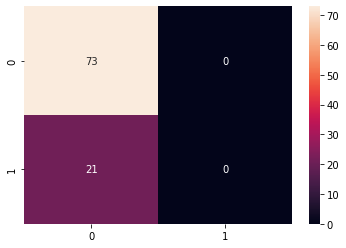

In [71]:
target = suicide_risk_test2["attempt_suicide"]
input_columns = suicide_risk_test2.loc[:, suicide_risk_test2.columns != "attempt_suicide"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

X = x_train
y = y_train

rand_model = RandomForestClassifier(bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100)
rand_model = rand_model.fit(x_train, y_train)

y_pred = rand_model.predict(x_test)
print(y_pred)
print(np.array(y_test))

total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

In [72]:
suicide_risk_test2

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,1,1,35,9,3,0,1,0,0,0.0,1,1,1,1,0,242,0,1
1,1,0,21,1,3,3,1,0,0,0.0,1,1,1,0,2,4,6,2
2,1,1,22,0,3,2,1,0,0,10.0,1,1,0,0,2,271,6,2
3,1,1,19,1,3,2,1,1,0,8.0,1,1,1,0,1,262,6,0
4,1,1,23,9,3,2,0,0,1,10.0,0,1,0,0,0,61,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0,1,26,2,3,2,1,0,2,10.0,1,0,1,0,0,42,4,0
465,1,1,31,9,3,0,0,0,2,10.0,0,0,0,0,0,218,3,2
466,0,1,17,1,0,0,1,0,0,20.0,1,1,1,1,0,254,7,0
467,1,1,18,0,0,1,1,0,0,16.0,1,1,1,0,2,171,3,3
